In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

plt.rcParams["figure.dpi"] = 600

In [2]:
def run(file):
    title = ['(a) WiscSort', '(b) TSort']
    xstep = [4, 2]
    ystep = [3, 2]
    xlim = [40, 24]
    ylim = [27, 16]

    for fidx in range(len(file)):
        plt.figure(figsize=(3.5, 2))
        pmem_pd = pd.read_csv(file[fidx], delimiter=r",", engine='python', header=None)
        pm_df = pd.DataFrame(columns = ['time', 'OP', 'time_taken', 'data', 'read_bw', 'write_bw'])
        pm_df = pm_df._append({'time': 1, 'OP': 'FILLER', 'time_taken': 0, 'data': 0, 'read_bw': 0, 'write_bw': 0}, ignore_index=True)
        for index, row in pmem_pd.iterrows():
            if fidx == 0:
                read_bw = 0
                write_bw = 0
                data_gb = row[3] * 1.0e-9
                if row[1] == 'READ':
                    read_bw = data_gb/row[2]
                if row[1] == 'WRITE':
                    write_bw = data_gb/row[2]
            else:
                data_gb_w = row[3] * 1.0e-9
                data_gb_r = row[4] * 1.0e-9
                write_bw = data_gb_w/row[2]
                read_bw = data_gb_r/row[2]
            pm_df = pm_df._append({'time': row[0] - row[2] - 0.0001, 'OP': 'FILLER', 'time_taken': row[2], 'data': row[3], 'read_bw': 0, 'write_bw': 0}, ignore_index=True)    
            pm_df = pm_df._append({'time': row[0] - row[2], 'OP': row[1], 'time_taken': row[2], 'data': row[3], 'read_bw': read_bw, 'write_bw': write_bw}, ignore_index=True)
            pm_df = pm_df._append({'time': row[0], 'OP': row[1], 'time_taken': row[2], 'data': row[3], 'read_bw': read_bw, 'write_bw': write_bw}, ignore_index=True)
            pm_df = pm_df._append({'time': row[0] + 0.0001, 'OP': 'FILLER', 'time_taken': row[2], 'data': row[3], 'read_bw': 0, 'write_bw': 0}, ignore_index=True)
        plt.xticks(np.arange(0, xlim[fidx]+1, step=xstep[fidx]), size=8)
        plt.yticks(np.arange(0, ylim[fidx]+1, step=ystep[fidx]), size=8)
        plt.xlim(-0.5, xlim[fidx])
        plt.ylim(-0.05, ylim[fidx])
        plt.plot(pm_df['time'], pm_df['read_bw'], color='#0385D8', linewidth=0.6)
        plt.plot(pm_df['time'], pm_df['write_bw'], color='#FFBD29', linewidth=0.6)
        plt.plot(0, 0, color='#0385D8', label="read", linewidth=1.2)
        plt.plot(0, 0, color='#FFBD29', label="write", linewidth=1.2)
        plt.xlabel("Time (s)", size=8)
        plt.ylabel("Bandwdith (GB/s)", size=8)
        ax = plt.gca()
        xlabel = ax.xaxis.get_label()
        xlabel.set_horizontalalignment('right')
        xlabel.set_position((1, 0))
        if fidx == 0: plt.legend(ncol=1, loc='upper left', fontsize=8)
        plt.grid(linestyle='--', alpha=0.3)
        plt.tight_layout()
        # plt.savefig('fig/bandwidth_'+str(fidx)+'.pdf', format='pdf')

    plt.show()

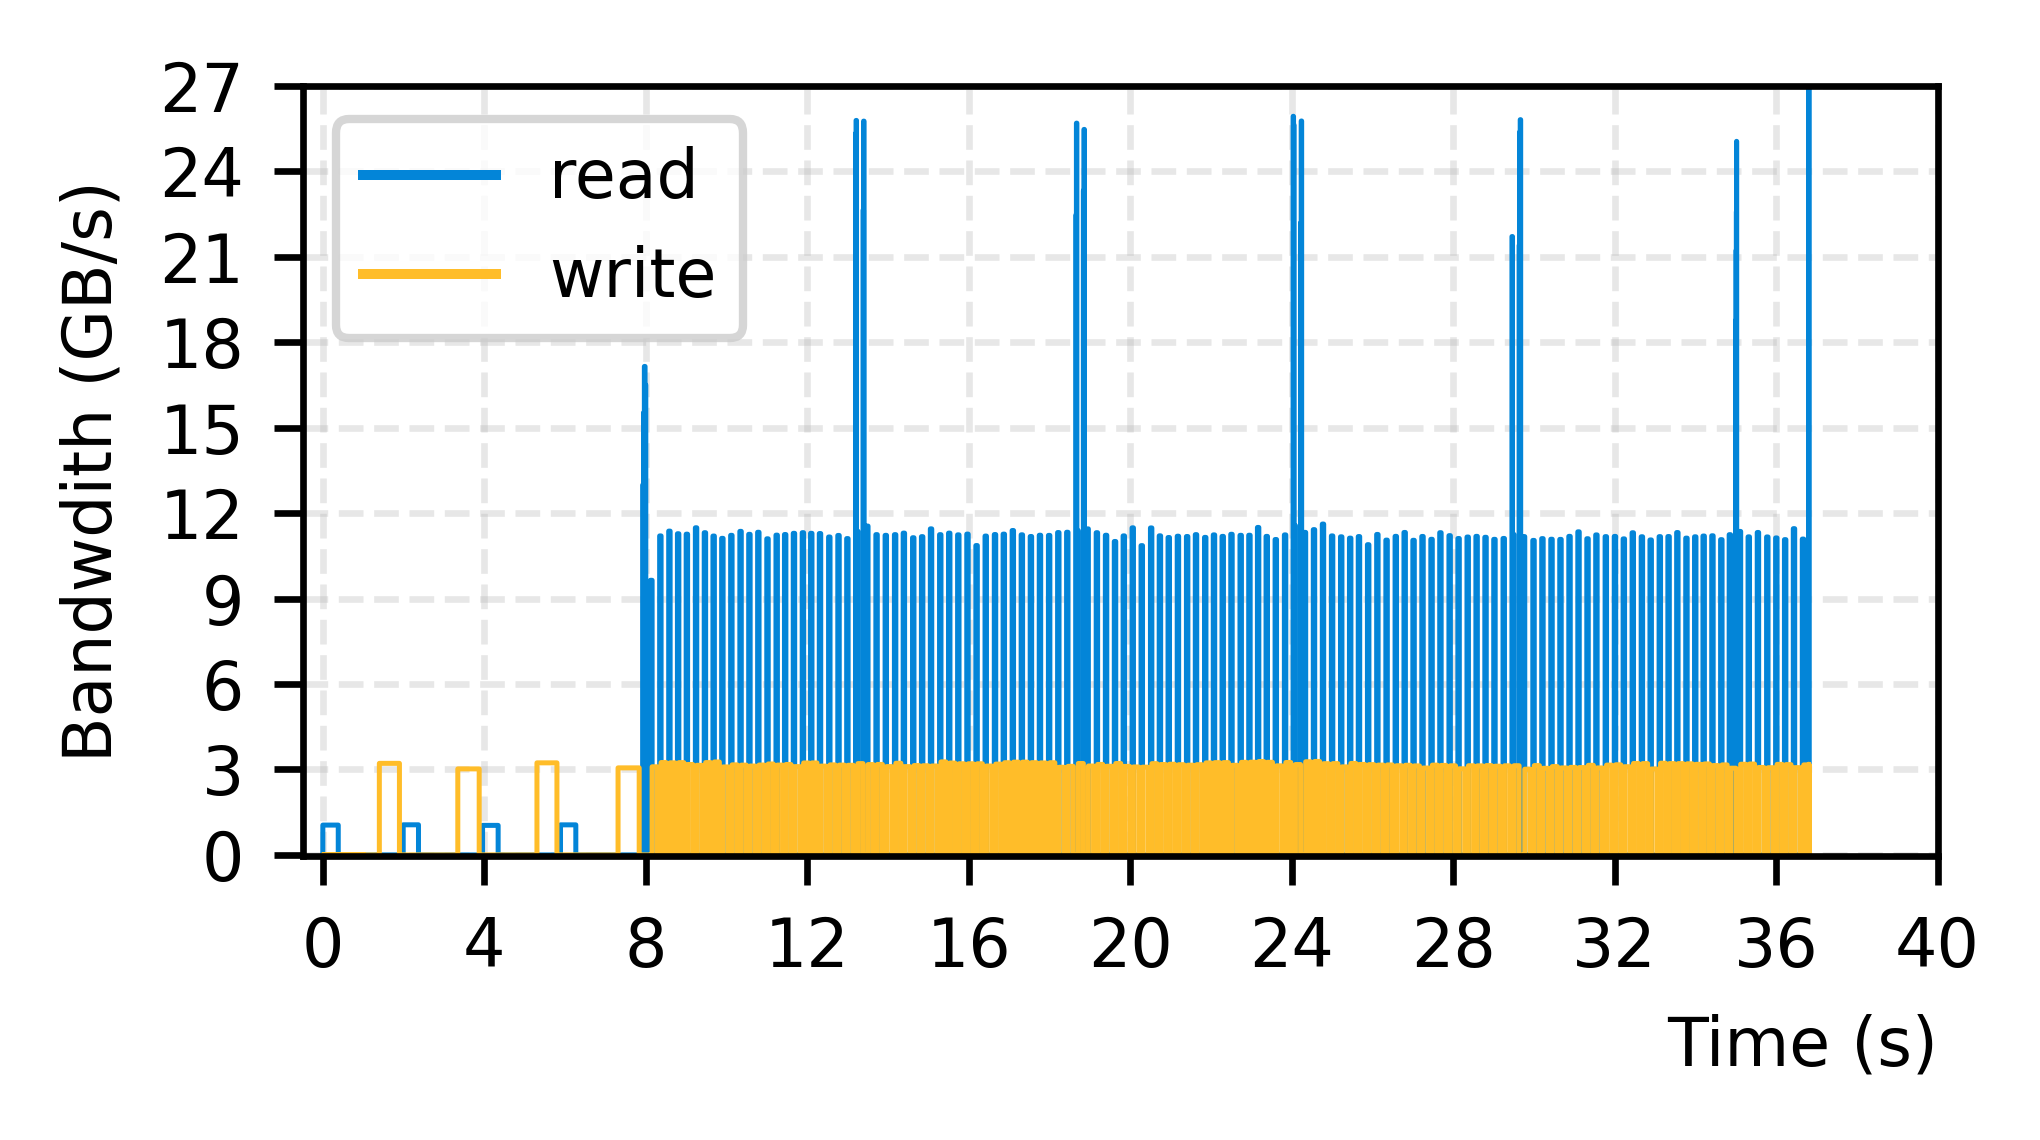

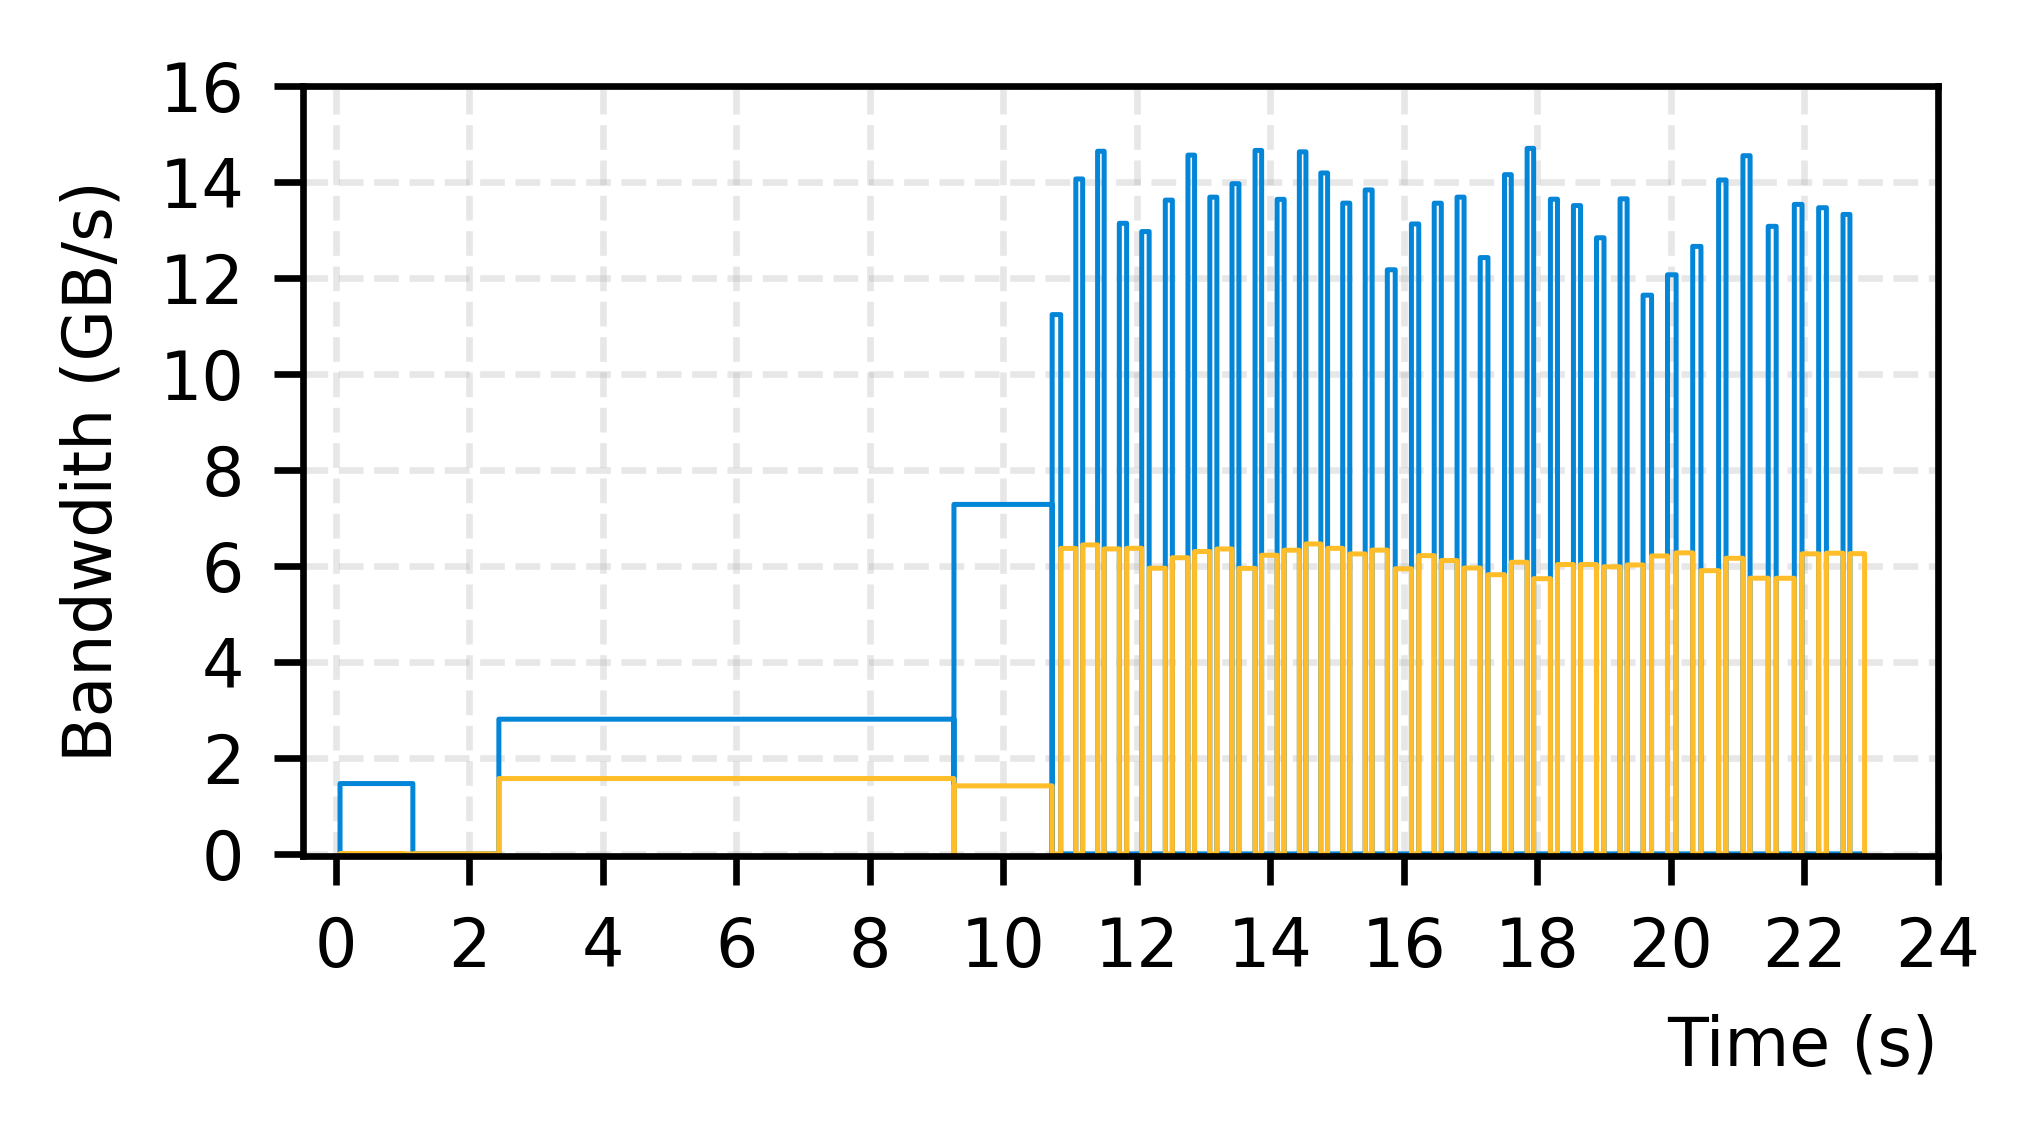

In [3]:
folder = '20231025_bandwidth'
datasize = '400m'
datatype = 'uniform'
date = '20231025'
file = [folder+'/'+datasize+"_wisc_v3_"+datatype+"_"+date+".out",
    folder+'/'+datasize+"_et_v7_"+datatype+"_"+date+".out"]
run(file)